In [5]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
data = np.genfromtxt('./data/train.csv', delimiter=',', skip_header=1)

In [7]:
X, Y = data[:, 1:], data[:, 0]

# X = X.T

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .2)

In [27]:
def plotImage(index, X, Y, predict=-1):
    fig = plt.figure(figsize=(10,6))
    image = X.reshape(28,28)
    plt.imshow(image, cmap='gray')
    if predict == -1:
        plt.title(f'Index: {index} \nLabel : {int(Y[index])}')
    else:
        plt.title(f'Index: {index} \nLabel : {int(Y[index])} \nPredicted : {predict}')
    plt.show()

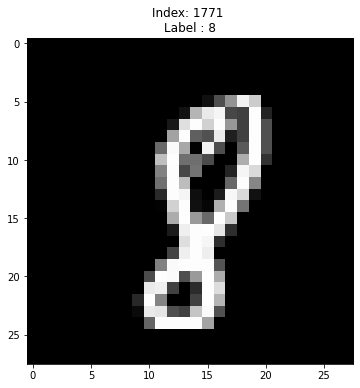

In [32]:
index = np.random.choice(range(X.shape[0]), size=1)

plotImage(index[0], X[index, :], Y)

# Logistic regression

In [20]:
logit = LogisticRegression(multi_class='multinomial')

params = {
    'C':np.arange(1e-6, 2, 20),
    'solver':['newton-cg', 'sag', 'lbfgs']
}

grid_logit = GridSearchCV(logit, params, cv=6)

grid_logit.fit(X_train, Y_train)

/home/dantole/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:426: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/home/dantole/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/dantole/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
/home/dantole/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:426: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/home/dantole/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/dantole/anaconda3

GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100,
                                          multi_class='multinomial',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.e-06]),
                         'solver': ['newton-cg', 'sag', 'lbfgs']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [23]:
index = np.random.choice(range(X_test.shape[0]), size=1)

plotImage(index[0], X_test[index, :], Y_test, grid_logit.best_estimator_.predict(X_test[index, :]))

0.9189285714285714